In [34]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from Orange import evaluation

sns.set()

In [2]:
piezo_list = pd.read_csv('../data_collection/dataset_nomissing_linear.csv', usecols=['bss'], squeeze=True).unique()
print(piezo_list.size)

1329


In [3]:
result_folder = './'

In [4]:
# load lagacy results
files = [result_folder + 'oldTG_local_part1.csv', 
          result_folder + 'oldTG_local_part2.csv',
          result_folder + 'oldTG_local_part3.csv',
          result_folder + 'oldTG_local_part4.csv',
          result_folder + 'oldTG_local_cmpl.csv',
          result_folder + 'oldTG_local_xgb.csv']
lagacy_result = pd.concat([pd.read_csv(file, delimiter='\t') for file in files])
lagacy_result['rmse'] = np.sqrt(lagacy_result.mse)
lagacy_result = lagacy_result.rename(columns={'id_method_ML': 'model', 'use_exo_eto': 'use_exo_evo'})
lagacy_result = lagacy_result[~lagacy_result.approx_exo]
lagacy_result = lagacy_result[lagacy_result.id_piezo.isin(piezo_list)]
lagacy_result

,id_piezo,model,type,r,use_exo_rain,use_exo_evo,use_exo_bdlisa,approx_exo,rmsse,mse,rmse
0,00065X0148/P,lm,Local,100.0,False,False,False,False,0.678561,0.010110,0.100549
2,00065X0148/P,lm,Local,100.0,True,False,False,False,3.557765,0.277926,0.527187
4,00065X0148/P,lm,Local,100.0,True,True,False,False,1.676050,0.061680,0.248356
6,00065X0148/P,svr,Local,100.0,False,False,False,False,2.311324,0.117299,0.342490
8,00065X0148/P,svr,Local,100.0,True,False,False,False,1.311381,0.037760,0.194319
...,...,...,...,...,...,...,...,...,...,...,...
6811,11172X0119/COSCIA,xgb,Local,100.0,True,False,False,False,12.570613,0.979990,0.989944
6813,11172X0119/COSCIA,xgb,Local,100.0,True,True,False,False,9.910524,0.609119,0.780460
6820,BSS002PTEJ/MONTFR,xgb,Local,100.0,False,False,False,False,2.884880,0.179042,0.423134
6821,BSS002PTEJ/MONTFR,xgb,Local,100.0,True,False,False,False,8.206104,1.448684,1.203613


In [5]:
deepar_result = pd.read_csv(result_folder + 'local_DeepAR.csv', index_col=0)
deepar_result = deepar_result.rename(columns={'item_id': 'id_piezo'})
deepar_result = deepar_result[deepar_result.id_piezo.isin(piezo_list)]
deepar_result['type'] = 'Local'
deepar_result['model'] = 'DeepAR-L'
deepar_result

,id_piezo,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,...,Coverage[0.5],QuantileLoss[0.9],Coverage[0.9],model,learningtime,use_exo_rain,use_exo_evo,rmse,rmsse,type
0,00061X0117/PZ1,0.902200,76.902985,1554.979980,16.720215,0.039488,20.941091,0.047679,0.049182,453.183072,...,0.000000,96.114441,0.096774,DeepAR-L,198.720829,False,False,0.949842,0.312912,Local
0,00061X0117/PZ1,8.400408,239.918106,1554.979980,16.720215,0.039488,65.330973,0.149502,0.164411,2175.149373,...,0.000000,388.433051,0.000000,DeepAR-L,208.144464,True,False,2.898346,0.954820,Local
0,00061X0117/PZ1,5.602196,203.030502,1554.979980,16.720215,0.039488,55.286283,0.127635,0.118876,1897.606048,...,1.000000,43.965801,1.000000,DeepAR-L,213.401926,False,True,2.366896,0.779741,Local
0,00061X0117/PZ1,0.942782,85.275223,1554.979980,16.720215,0.039488,23.220895,0.054475,0.052851,689.813356,...,1.000000,19.558257,1.000000,DeepAR-L,210.930331,True,True,0.970970,0.319872,Local
0,00065X0148/P,0.122634,27.618132,135.084976,1.452527,0.068480,4.336567,0.221778,0.189348,20.170221,...,0.806452,8.894476,0.989247,DeepAR-L,218.570981,False,False,0.350191,0.048281,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,03114X0023/F,0.393745,52.112705,638.470032,6.865269,0.059145,9.474267,0.081318,0.085599,147.290866,...,0.000000,47.913919,0.182796,DeepAR-L,181.536647,True,True,0.627491,0.119188,Local
0,03124X0088/F,0.869624,77.115791,1445.389771,15.541825,0.101746,8.149762,0.052968,0.054713,72.513251,...,0.000000,48.379220,0.408602,DeepAR-L,181.063128,False,False,0.932536,0.105651,Local
0,03124X0088/F,0.347870,45.696560,1445.389771,15.541825,0.101746,4.829310,0.031274,0.031966,32.969175,...,0.000000,24.209062,0.655914,DeepAR-L,179.675950,True,False,0.589805,0.066821,Local
0,03124X0088/F,1.684302,106.369133,1445.389771,15.541825,0.101746,11.241318,0.073787,0.070393,186.979476,...,1.000000,29.809998,1.000000,DeepAR-L,1535.066236,False,True,1.297807,0.147033,Local


In [6]:
deepar_global_result = pd.read_csv(result_folder + 'global_DeepAR.csv', index_col=0)
deepar_global_result = deepar_global_result.rename(columns={'item_id': 'id_piezo'})
deepar_global_result = deepar_global_result[deepar_global_result.id_piezo.isin(piezo_list)]
deepar_global_result['type'] = 'Global'
deepar_global_result['model'] = 'DeepAR-G'
deepar_global_result

,id_piezo,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,...,QuantileLoss[0.9],Coverage[0.9],model,learningtime,use_exo_rain,use_exo_evo,rmse,TN,rmsse,type
0,00061X0117/PZ1,28.201361,432.817413,1680.369995,18.068495,0.036981,125.848474,0.270044,0.228872,3987.272261,...,99.366697,1.000000,DeepAR-G,158.593535,False,False,5.310495,7.7114,1.912355,Global
1,00065X0148/P,0.079545,22.624023,78.969994,0.849140,0.069380,3.506327,0.352270,0.311598,37.990210,...,13.947623,0.516129,DeepAR-G,158.593535,False,False,0.282038,50.9076,0.039529,Global
2,00068X0010/F295,16.416608,333.931671,2281.949951,24.537096,0.048930,73.383017,0.147786,0.134859,1889.443942,...,78.900801,1.000000,DeepAR-G,158.593535,False,False,4.051741,55.6493,0.543140,Global
3,00068X0147/PZ5,6.163984,213.870361,557.310059,5.992581,0.095736,24.021092,0.376711,0.475498,615.673725,...,314.281504,0.000000,DeepAR-G,158.593535,False,False,2.482737,50.0311,0.351003,Global
4,00103X0322/F,20.326879,383.645844,2052.050049,22.065054,0.041784,98.726880,0.189746,0.170095,2795.955115,...,89.356282,1.000000,DeepAR-G,158.593535,False,False,4.508534,7.3337,1.664845,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,11064X0013/ALISO,6.183618,220.744583,399.720032,4.298065,0.046446,51.104666,0.594793,0.446148,1513.302633,...,52.256680,1.000000,DeepAR-G,152.316203,True,True,2.486688,90.7060,0.261098,Global
1325,11128X0125/CHIUNI,0.166133,30.132217,154.310013,1.659247,0.043819,7.394070,0.200631,0.229218,45.661970,...,18.145498,0.537634,DeepAR-G,152.316203,True,True,0.407594,20.3951,0.090254,Global
1326,11156X0009/BRAVON,0.004061,3.923664,359.519958,3.865806,0.029574,1.426586,0.011027,0.011006,57.293475,...,9.432588,1.000000,DeepAR-G,152.316203,True,True,0.063728,41.3063,0.009916,Global
1327,11172X0119/COSCIA,0.247196,36.133377,139.479996,1.499785,0.031510,12.330517,0.230481,0.270633,241.648391,...,41.029166,0.376344,DeepAR-G,152.316203,True,True,0.497188,13.8970,0.133371,Global


In [7]:
files = [result_folder + 'local_prophet.csv', 
          result_folder + 'local_neuralprophet.csv',
          result_folder + 'local_Conv.csv']
deeplearning_result = pd.concat([pd.read_csv(file, delimiter=',') for file in files])
deeplearning_result = deeplearning_result.rename(columns={'bss_code': 'id_piezo', 'rmse_test': 'rmse', 'rmsse_test': 'rmsse'})
deeplearning_result['type'] = 'Local'
deeplearning_result

,id_piezo,model,rmse_train,rmse,rmsse_train,rmsse,learningtime,use_exo_rain,use_exo_evo,h1,...,h85,h86,h87,h88,h89,h90,h91,h92,h93,type
0,00061X0117/PZ1,prophet,0.488528,2.175824,7.960620,35.455277,2.330072,False,False,18.839719,...,13.422211,13.341446,13.257657,13.173283,13.086170,12.999007,12.911500,12.821803,12.728433,Local
1,00061X0117/PZ1,prophet,0.490650,2.091435,7.995192,34.080149,2.812232,True,False,18.800987,...,13.531490,13.387970,13.301574,13.211442,13.163168,13.187693,13.050679,13.300005,12.765216,Local
2,00061X0117/PZ1,prophet,0.499139,2.088000,8.133520,34.024181,4.232455,False,True,18.821895,...,13.545005,13.434034,13.334121,13.255413,13.185108,13.164336,12.998898,12.932876,12.837580,Local
3,00061X0117/PZ1,prophet,0.485869,2.144736,7.917282,34.948703,4.070374,True,True,18.784292,...,13.472452,13.313678,13.217469,13.131480,13.091872,13.152289,12.968962,13.214312,12.703370,Local
4,00065X0148/P,prophet,0.308735,0.282583,2.007717,1.837651,0.702274,False,False,1.082109,...,0.746982,0.763810,0.781719,0.764617,0.750875,0.745400,0.757558,0.737699,0.750746,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,11172X0119/COSCIA,Conv,0.167488,1.108940,2.067863,13.691311,37.955303,True,True,1.899921,...,1.111521,0.998410,1.076619,1.096256,1.053281,1.102396,1.146742,1.186144,1.113417,Local
5312,BSS002PTEJ/MONTFR,Conv,0.266134,1.548399,1.761869,10.250750,37.491110,False,False,7.849946,...,8.070842,8.016481,8.138400,8.102386,8.214932,8.320789,8.391355,8.364293,8.200129,Local
5313,BSS002PTEJ/MONTFR,Conv,0.276729,1.063935,1.832006,7.043495,27.712773,False,True,8.196959,...,8.166830,8.204563,8.202096,8.085578,7.876491,7.840992,7.900182,7.799497,7.831738,Local
5314,BSS002PTEJ/MONTFR,Conv,0.361837,1.242493,2.395441,8.225587,25.459553,True,False,8.389545,...,7.965278,8.066618,7.987342,7.918390,8.019866,7.972155,7.796751,7.756256,7.823524,Local


In [8]:
all_result = pd.concat([lagacy_result, deepar_result, deepar_global_result, deeplearning_result])
all_result

,id_piezo,model,type,r,use_exo_rain,use_exo_evo,use_exo_bdlisa,approx_exo,rmsse,mse,...,h84,h85,h86,h87,h88,h89,h90,h91,h92,h93
0,00065X0148/P,lm,Local,100.0,False,False,False,False,0.678561,0.010110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00065X0148/P,lm,Local,100.0,True,False,False,False,3.557765,0.277926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00065X0148/P,lm,Local,100.0,True,True,False,False,1.676050,0.061680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00065X0148/P,svr,Local,100.0,False,False,False,False,2.311324,0.117299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,00065X0148/P,svr,Local,100.0,True,False,False,False,1.311381,0.037760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,11172X0119/COSCIA,Conv,Local,NaN,True,True,NaN,NaN,13.691311,NaN,...,1.021178,1.111521,0.998410,1.076619,1.096256,1.053281,1.102396,1.146742,1.186144,1.113417
5312,BSS002PTEJ/MONTFR,Conv,Local,NaN,False,False,NaN,NaN,10.250750,NaN,...,7.968626,8.070842,8.016481,8.138400,8.102386,8.214932,8.320789,8.391355,8.364293,8.200129
5313,BSS002PTEJ/MONTFR,Conv,Local,NaN,False,True,NaN,NaN,7.043495,NaN,...,8.088997,8.166830,8.204563,8.202096,8.085578,7.876491,7.840992,7.900182,7.799497,7.831738
5314,BSS002PTEJ/MONTFR,Conv,Local,NaN,True,False,NaN,NaN,8.225587,NaN,...,8.008027,7.965278,8.066618,7.987342,7.918390,8.019866,7.972155,7.796751,7.756256,7.823524


In [9]:
cols = ['id_piezo', 'model', 'type', 'use_exo_rain', 'use_exo_evo', 'rmsse', 'rmse']

# Comparing without exo data

In [10]:
result_no_exo = all_result[cols]
result_no_exo = result_no_exo[~(result_no_exo.use_exo_evo | result_no_exo.use_exo_rain)]
result_no_exo

,id_piezo,model,type,use_exo_rain,use_exo_evo,rmsse,rmse
0,00065X0148/P,lm,Local,False,False,0.678561,0.100549
6,00065X0148/P,svr,Local,False,False,2.311324,0.342490
12,00065X0148/P,rf,Local,False,False,1.200861,0.177942
18,00065X0148/P,ARIMA,Local,False,False,1.004483,0.148843
48,00068X0010/F295,lm,Local,False,False,2.314481,0.364731
...,...,...,...,...,...,...,...
5296,11064X0013/ALISO,Conv,Local,False,False,8.649830,1.767990
5300,11128X0125/CHIUNI,Conv,Local,False,False,8.963119,0.882222
5304,11156X0009/BRAVON,Conv,Local,False,False,4.812858,0.659256
5308,11172X0119/COSCIA,Conv,Local,False,False,13.066098,1.058300


In [11]:
result_no_exo.groupby(['id_piezo', 'model']).count().describe() # must 1 everywhere

,type,use_exo_rain,use_exo_evo,rmsse,rmse
count,12087.0,12087.0,12087.0,12087.0,12087.0
mean,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


In [12]:
result_no_exo.isna().any()

id_piezo        False
model           False
type            False
use_exo_rain    False
use_exo_evo     False
rmsse           False
rmse            False
dtype: bool

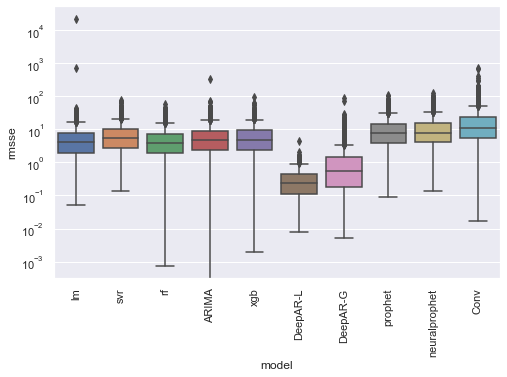

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=result_no_exo, y='rmsse', x='model')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale('log')

In [26]:
result_no_exo[result_no_exo.model == 'lm'].sort_values(by='rmsse').tail()

,id_piezo,model,type,use_exo_rain,use_exo_evo,rmsse,rmse
4536,07702X0242/P,lm,Local,False,False,40.077425,0.621098
3960,07464X0005/SM3,lm,Local,False,False,41.264317,0.491493
1752,09306X0091/F,lm,Local,False,False,44.246753,0.362252
5400,10165X0021/CAUVY,lm,Local,False,False,718.599362,30.062286
3816,04858X0135/PZ,lm,Local,False,False,22343.608210,18314.527862


In [29]:
result_no_exo.groupby('model')[['rmsse']].agg(['mean', 'std']).T

model           ARIMA       Conv  DeepAR-G  DeepAR-L          lm  \
rmsse mean   7.467625  21.420481  1.546116  0.359001   23.059593   
      std   11.655985  40.627956  4.050475  0.407453  613.066445   

model       neuralprophet    prophet        rf       svr       xgb  
rmsse mean      12.961817  11.816081  5.891300  8.071352  7.348983  
      std       14.971864  12.743601  6.339937  8.542264  8.068334

In [45]:
result_no_exo.groupby('model')['rmsse'].agg('rank')


0        61.0
6       267.0
12      178.0
18       84.0
48      405.0
        ...  
5296    542.0
5300    558.0
5304    307.0
5308    734.0
5312    634.0
Name: rmsse, Length: 12087, dtype: float64